In [52]:
import pandas as pd
import numpy as np

Load data vào sales df

In [53]:
sales_df = pd.read_csv('../data/advertising_and_sales_clean.csv')
sales_df

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18
...,...,...,...,...,...
4541,26000.0,4472.36,717.09,Micro,94685.87
4542,71000.0,20610.69,6545.57,Nano,249101.92
4543,44000.0,19800.07,5096.19,Micro,163631.46
4544,71000.0,17534.64,1940.87,Macro,253610.41


* Create x, an array of the values from the sales_df DataFrame's "radio" column.
* Create y, an array of the values from the sales df DataFrame's "sales" column.

In [54]:
x = np.array(sales_df['radio'])
y = np.array(sales_df['sales'])
x

array([ 6566.23,  9237.76, 15886.45, ..., 19800.07, 17534.64, 15966.69])

Reshape x into a two-dimensional NumPy array.

In [55]:
x_reshape = x.reshape(-1, 1)
x_reshape

array([[ 6566.23],
       [ 9237.76],
       [15886.45],
       ...,
       [19800.07],
       [17534.64],
       [15966.69]])

Print the shape of x and y.

In [56]:
print(x.shape)
print(y.shape)

(4546,)
(4546,)


Import LinearRegression.

In [57]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split

Instantiate a linear regression model.


In [58]:
model = lr()

Predict sales values using x, storing as predictions.

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x_reshape, y, test_size=0.2)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
predictions[:5]

array([208036.02654893,  78423.28351812, 234183.80242041, 112619.04875149,
       111634.3947559 ])

Import matplotlib.pyplot as plt.

In [60]:
import matplotlib.pyplot as plt

* Create a scatter plot visualizing y against x, with observations in blue.
* Draw a red line plot displaying the predictions against x.
* Display the plot.

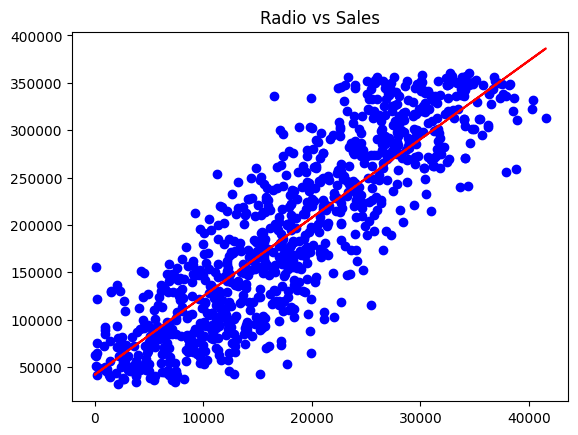

In [61]:
plt.title('Radio vs Sales')
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, predictions, color='red')
plt.show()

Now you have seen how linear regression works, your task is to create a multiple linear regression model using all of the features in the sales_df dataset.
* Create x, an array containing values of all features in sales_df, and y, containing all values from the "sales" column.
* Instantiate a linear regression model.
* Fit the model to the training data (70% for train).
* Create y pred, making predictions for sales using the test features.

In [62]:
# -	Create x, an array containing values of all features in sales_df, and y, containing all values from the “sales” column.
x = sales_df.drop("influencer", axis=1).values
y = sales_df['sales'].values
#-	Instantiate a linear regression model.
model = lr()
# -	Fit the model to the training data (70% for train).
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
# -	Create y_pred making predictions for the sales using the test features.
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred[:5]

array([112929.84, 355109.39, 327466.29, 153036.18, 326511.99])

Now you have fit a model, reg, using all features from sales_df, and made predictions of sales values, you can evaluate performance using some common regression metrics.
* Import mean squared error.
* Calculate the model's R-squared score by passing the test feature values and the test target values to an appropriate method.
* Calculate the model's root mean squared error using y_test and y_pred.
* Print r squared and rmse.

In [63]:
# -	Import mean_squared_error.
from sklearn.metrics import mean_squared_error
# -	Calculate the model’s R_squared score by passing the test feature values and the test target values to an appropriate method
r_squared = model.score(x_test, y_test)
# -	Calculate the model’s root mean squared error using y_test and y_pred.
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(r_squared, rmse)

1.0 1.044249917216197e-10


c:\Users\TranNgocPhat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.
* Import KFold and cross_val_score.
* Create kf by calling KFold (), setting the number of splits to six, shuffle to True, and setting
a seed of 5.
* Perform cross-validation using reg on x and y, passing kf to cv.
* Print the cv scores.

In [64]:
# import KFold and cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# -	Create kf by calling Kfold(), setting the number of splits to six, shuffle to True, and setting a seed of 5.
kf = KFold(n_splits=6, shuffle=True, random_state=5)
#-	Perform cross-validation using reg on x and y, passing kf to cv.
cv_scores = cross_val_score(model, x, y, cv=kf)
print(cv_scores)

[1. 1. 1. 1. 1. 1.]


Now you have performed cross-validation, it's time to analyze the results.


You will display the mean, standard deviation, and 95% confidence interval for cv_results, which has been preloaded for you from the previous exercise.
* Calculate and print the mean of the results.
* Calculate and print the standard deviation of cv_results.
* Display the 95% confidence interval for your results using np.quantile().

In [65]:
cv_results = cv_scores
mean = np.mean(cv_results)
std_dev = np.std(cv_results)
confidence_interval = np.percentile(cv_results, [2.5, 97.5])

print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("95% Confidence Interval:", confidence_interval)

Mean: 1.0
Standard Deviation: 0.0
95% Confidence Interval: [1. 1.]


Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.


In this exercise, you will fit ridge regression models over a range of different alpha values, and print their R2 scores. You will use all of the features in the sales_df dataset to predict "sales". The data has been split into X train, X test, y_train, y test for you.


alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
* Import Ridge.
* Instantiate Ridge, setting alpha equal to alpha.
* Fit the model to the training data.
* Calculate the R2 score for each iteration of ridge.

In [66]:
# import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
# -	Instantiate Ridge, setting alpha equal to alpha.
for i in alphas:
    ridge = Ridge(alpha=i)
    # -	Fit the model to the training data.
    ridge.fit(x_train, y_train)
    #-	Calculate the R^2 score for each interation of ridge
    r_squared = ridge.score(x_test, y_test)
    print(r_squared)

1.0
1.0
1.0
1.0
1.0
0.9999999999999999


In the video, you saw how lasso regression can be used to identify important features in a dataset.


In this exercise, you will fit a lasso regression model to the sales_df data and plot the model's coefficient
* Import Lasso from sklearn.linear_model.
* Instantiate a Lasso regressor with an alpha of 0.3.
* Fit the model to the data.
* Compute the model's coefficients, storing as lasso coef.

In [67]:
# Import Lasso from sklearn.linear_model
from sklearn.linear_model import Lasso
# -	Instantiate Lasso
lasso = Lasso(alpha=0.3)
# -	Fit the model to the data.
lasso.fit(x_train, y_train)
# Compute the model's coefficient, storingg as lasso_coef
lasso_coef = lasso.coef_
lasso_coef

array([ 1.34067537, -0.00581829,  0.01481774,  0.6243635 ])